In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
training_data = pd.read_csv('datasets/mnist/mnist_train.csv')
testing_data = pd.read_csv('datasets/mnist/mnist_test.csv')

In [75]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)
m, n = data.shape

4


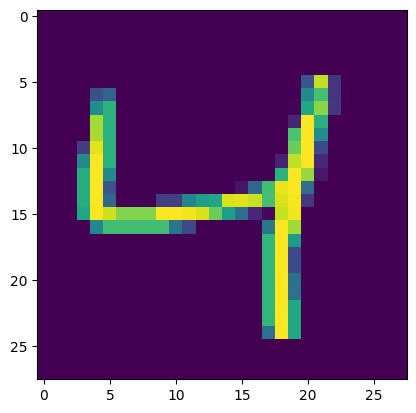

In [82]:
print(training_data[2][0])
plt.imshow(training_data[2][1:].reshape(28,28))

In [92]:
# Have to transpose to get all Xs and Ys as easier to index rows 
#(make the entire first row Ys instead of being the first columns)
#training_data = training_data.T
X_train = training_data.T[1:n]
Y_train = training_data.T[0]

X_test = testing_data.T[1:n]
Y_test = testing_data.T[0]

Y_train, Y_test, X_test.shape

(array([5, 0, 4, ..., 5, 6, 8]), array([7, 2, 1, ..., 4, 5, 6]), (784, 10000))

In [110]:
def init_params():
    W1 = np.random.rand(10, X_test.shape[0])
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10)   # 784 inputs -> 10 Neuron L1 -> 10 'Neuron' output (one neuron per probability)
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2
    
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def dReLu(Z):
    return Z > 0
    
    
def backprop(Z1, A1, Z2, A2, W2, Y, X):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, 2)
    dZ1 = W2.T.dot(dZ2) * dReLu(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, 2)
    
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): 
    # alpha = learning rate
    W1 = W1 - (alpha * dW1)
    W2 = W2 - (alpha * dW2)
    b1 = b1 - (alpha * db1)
    b2 = b2 - (alpha * db2)
    
    return W1, b1, W2, b2    

In [111]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def grad_desc(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
            
    return W1, b1, W2, b2

In [112]:
W1, b1, W2, b2 = grad_desc(X_train, Y_train, 10, 0.1)

/var/folders/wm/__l0fc591sq7slb291x0x2400000gn/T/ipykernel_17087/2347744825.py:13: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / np.sum(np.exp(Z))
/var/folders/wm/__l0fc591sq7slb291x0x2400000gn/T/ipykernel_17087/2347744825.py:13: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / np.sum(np.exp(Z))


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (47040000,) (784,60000) 